In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from cmocean import cm as cmo
plt.style.use('seaborn-poster')
plt.style.use('ggplot')

import numpy as np
import pandas as pd
import xarray as xr
import scipy
import glob
import matplotlib.dates as mdates
import datetime
import dask.array as da

In [2]:
IreneBuoy = '/Users/cew145/Documents/codar_data/ndb_44009_2011_winds.txt'
ArthuBuoy = "../data/ndbc_years/44009h2014.txt"

In [3]:
dfI = pd.read_csv(IreneBuoy, skiprows=[1], delim_whitespace=True)
dfA = pd.read_csv(ArthuBuoy, skiprows=[1], delim_whitespace=True)

In [6]:
dfI_datenum = [mdates.date2num(datetime.datetime(dfI['#YY'][i],dfI['MM'][i],dfI['DD'][i],dfI['hh'][i],dfI['mm'][i])) 
               for i in range(len(dfI))]
dfI['datenum'] = dfI_datenum

dfA_datenum = [mdates.date2num(datetime.datetime(dfA['#YY'][i],dfA['MM'][i],dfA['DD'][i],dfA['hh'][i],dfA['mm'][i])) 
               for i in range(len(dfA))]
dfA['datenum'] = dfA_datenum

In [20]:
arthuEP_dnum = 16255.625;
startA = mdates.date2num(datetime.datetime(2014,7,1))
endddA = mdates.date2num(datetime.datetime(2014,7,7))

ireneEP_dnum = 15214.285;

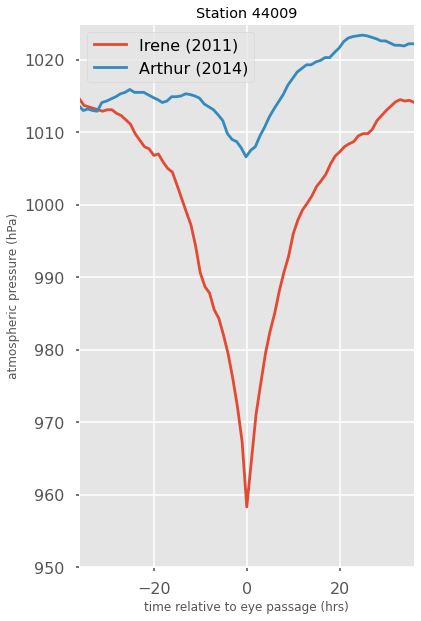

In [30]:
plt.figure(figsize=(6,10))
plt.plot((dfI.datenum - ireneEP_dnum)*24, dfI['PRES'], label='Irene (2011)')
plt.plot((dfA.datenum - arthuEP_dnum)*24, dfA['PRES'], label='Arthur (2014)')
plt.legend()
plt.title('Station 44009')
plt.ylabel('atmospheric pressure (hPa)')
plt.xlabel('time relative to eye passage (hrs)')
plt.ylim([950,1025])
plt.xlim([-36,36])
plt.savefig("FIGS/PressureComps.pdf", bbox_inches='tight')

In [37]:
xx = np.linspace(-1,1,100)
yy = (1-xx**2)**2

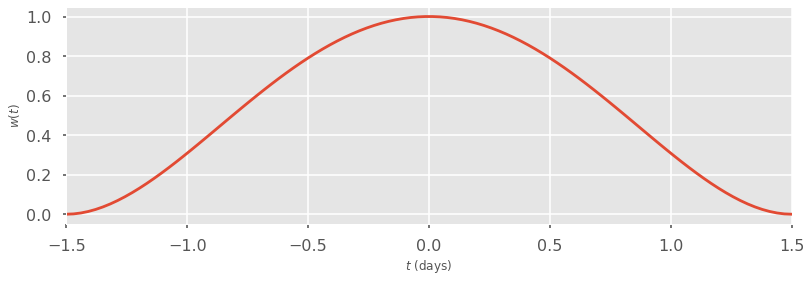

In [42]:
plt.figure(figsize=(13,4))
plt.plot(xx*1.5,yy)
plt.ylabel('$w(t)$')
plt.xlabel('$t$ (days)')
plt.xlim([-1.5, 1.5])
plt.savefig("FIGS/weighting_fxn.pdf", bbox_inches='tight')